### What were covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (infrence)",
    5: "Saving and loading a model",
    6: "putting it all together"
}

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

torch.__version__

'2.9.1+cpu'

### Data (preparing and loading)

Data can be almost anything ... in machine Learning

* Excel spreadsheet
* Images of any kind
* Videos (Youtube has a lot of data..)
* Audiol like songs or podcasts
* DNA
* Texts

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

In [2]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create range value
start = 0
end = 1
step = 0.02

# Create X and y (feature and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # Without unsqueeze, errors will pop
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [4]:
len(X_train)

40

In [5]:
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_train,
                    test_labels =y_test,
                    predictions=None):
    """Plots training data, test data and compare predictions"""

    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label='Training data')

    # Plot test data in blue
    plt.scatter(test_data, test_labels, c="g", s=4, label='Testing data')

    # Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exists
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")
    # Show the legend
    plt.legend(prop={'size':14})


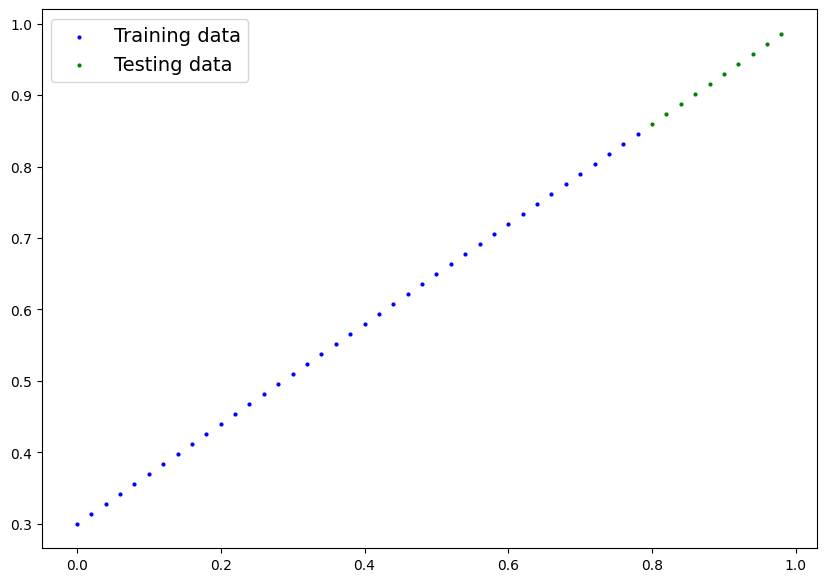

In [6]:
# Plot the data
# Note: if you don't have the plot prediction function loaded, this will error
plot_prediction(X_train, y_train, X_test, y_test) 

### Building a PyTorch Linear Model

In [7]:
print(X.shape)
print(y.shape)

torch.Size([50, 1])
torch.Size([50, 1])


In [8]:
# Create a Linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,    # in_features/out_features --> Linear
                                      out_features=1)   # in_channels/out_channels --> Convolution
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [9]:
next(model_1.parameters()).device

device(type='cpu')

In [10]:
# Set the model to use the target device
# model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [11]:
# Setup loss function
loss_nn = nn.L1Loss()   # Same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [ ]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
    # Optimizer zero grad
    optimizer.zero_grad()

    model_1.train()

    # Forward pass
    y_pred = model_1(X_train)

    # Calculate loss
    loss= loss_nn(y_pred, y_train)

    # Perform backpropogation
    loss.backward()
    
    # optimizer step
    optimizer.step()

    ## Testing
    model_1.eval
